In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM, Dropout, Activation, Bidirectional
from tensorflow.keras.optimizers import Adam

In [3]:
from text_cleaning import text_cleaning

# Cleaning of train data

In [4]:
data = pd.read_csv('emotion_detection_text_dataset/train.txt', delimiter=';', header=None, names=['text', 'label'])
data

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [5]:
# removing duplicate values

a = len(data)
data = data.drop_duplicates(subset=['text']).reset_index(drop=True)
b = len(data)
print('number of duplicate values removed: ', a-b)

number of duplicate values removed:  31


In [6]:
# removing rows with nan values

a = len(data)
data = data.dropna()
data = data.reset_index(drop=True)
b = len(data)
print('number of rows with NaN values removed: ', a-b)

number of rows with NaN values removed:  0


In [7]:
# shuffling the dataset

data = data.sample(frac=1, random_state=123).reset_index(drop=True)   
data

,text,label
0,i more important than going fun ipad strategy ...,sadness
1,i feel virtuous eating them not as some sort o...,joy
2,i am feeling a lil bit gloomy,sadness
3,i wave remember how many people love you and f...,joy
4,i feel so blessed and beyond thankful for the ...,joy
...,...,...
15964,i have realized from this past week is that it...,sadness
15965,i just feel cold and drained all the time im e...,anger
15966,im supposed to feel compassionate towards that...,love
15967,i write when i m feeling low,sadness


In [8]:
data.label.nunique()

6

In [9]:
data.label.value_counts()

joy         5350
sadness     4664
anger       2155
fear        1933
love        1299
surprise     568
Name: label, dtype: int64

In [10]:
# saving the clean data

'''
clean_train_data = data.copy()

for i in tqdm(range(len(data))):
    clean_train_data.loc[i, 'text'] = str(text_cleaning(data.loc[i, 'text']))
    
clean_train_data.to_csv('emotion_detection_text_dataset/clean_train_data.csv', index=False)
    '''

"\nclean_train_data = data.copy()\n\nfor i in tqdm(range(len(data))):\n    clean_train_data.loc[i, 'text'] = str(text_cleaning(data.loc[i, 'text']))\n    \nclean_train_data.to_csv('emotion_detection_text_dataset/clean_train_data.csv', index=False)\n    "

In [11]:
# importing the saved clean data

clean_train_data = pd.read_csv('emotion_detection_text_dataset/clean_train_data.csv')

In [12]:
clean_train_data.tail()

,text,label
15964,realized past week ok feel heartbroken,sadness
15965,feel cold drained time im either hungry tired ...,anger
15966,im supposed feel compassionate towards little ...,love
15967,write feeling low,sadness
15968,feel petty moaning annoying im keeping stuff b...,anger


# Cleaning of val data

In [13]:
data = pd.read_csv('emotion_detection_text_dataset/val.txt', delimiter=';', header=None, names=['text', 'label'])
data.tail()

,text,label
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy
1999,i feel like i just wanna buy any cute make up ...,joy


In [14]:
# removing duplicate values

a = len(data)
data = data.drop_duplicates(subset=['text']).reset_index(drop=True)
b = len(data)
print('number of duplicate values removed: ', a-b)

number of duplicate values removed:  2


In [15]:
# removing rows with nan values

a = len(data)
data = data.dropna()
data = data.reset_index(drop=True)
b = len(data)
print('number of rows with NaN values removed: ', a-b)

number of rows with NaN values removed:  0


In [16]:
# shuffling the dataset

data = data.sample(frac=1, random_state=123).reset_index(drop=True)   
data.tail()

,text,label
1993,i still feel extremely helpless,fear
1994,i don t feel disgusted with it by then it s sa...,anger
1995,i now know how bad it feels like to have someo...,sadness
1996,i feel so dumb about it,sadness
1997,i am awake again early enough to see the dark ...,joy


In [17]:
data.label.nunique()

6

In [18]:
data.label.value_counts()

joy         703
sadness     550
anger       274
fear        212
love        178
surprise     81
Name: label, dtype: int64

In [19]:
# saving the clean data
'''
clean_val_data = data.copy()

for i in tqdm(range(len(data))):
    clean_val_data.loc[i, 'text'] = str(text_cleaning(data.loc[i, 'text']))
    
clean_val_data.to_csv('emotion_detection_text_dataset/clean_val_data.csv', index=False)
    '''

"\nclean_val_data = data.copy()\n\nfor i in tqdm(range(len(data))):\n    clean_val_data.loc[i, 'text'] = str(text_cleaning(data.loc[i, 'text']))\n    \nclean_val_data.to_csv('emotion_detection_text_dataset/clean_val_data.csv', index=False)\n    "

In [20]:
# importing the saved clean data

clean_val_data = pd.read_csv('emotion_detection_text_dataset/clean_val_data.csv')

In [21]:
clean_val_data.tail()

,text,label
1993,always want guests know much appreciate coming...,joy
1994,really feeling appreciative connected nature,joy
1995,feel though talking month acceptable please pr...,joy
1996,wanted press charges people street guess didnt...,anger
1997,feel like im loyal boyfriend even though acted...,love


# Cleaning of test data

In [22]:
data = pd.read_csv('emotion_detection_text_dataset/test.txt', delimiter=';', header=None, names=['text', 'label'])
data.tail()

,text,label
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy
1999,i feel all weird when i have to meet w people ...,fear


In [23]:
# removing duplicate values

a = len(data)
data = data.drop_duplicates(subset=['text']).reset_index(drop=True)
b = len(data)
print('number of duplicate values removed: ', a-b)

number of duplicate values removed:  0


In [24]:
# removing rows with nan values

a = len(data)
data = data.dropna()
data = data.reset_index(drop=True)
b = len(data)
print('number of rows with NaN values removed: ', a-b)

number of rows with NaN values removed:  0


In [25]:
data.label.nunique()

6

In [26]:
data.label.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64

In [27]:
# saving the clean data

'''
clean_test_data = data.copy()

for i in tqdm(range(len(data))):
    clean_test_data.loc[i, 'text'] = str(text_cleaning(data.loc[i, 'text']))
    
clean_test_data.to_csv('emotion_detection_text_dataset/clean_test_data.csv', index=False)
    '''

"\nclean_test_data = data.copy()\n\nfor i in tqdm(range(len(data))):\n    clean_test_data.loc[i, 'text'] = str(text_cleaning(data.loc[i, 'text']))\n    \nclean_test_data.to_csv('emotion_detection_text_dataset/clean_test_data.csv', index=False)\n    "

In [28]:
# importing the saved clean data

clean_test_data = pd.read_csv('emotion_detection_text_dataset/clean_test_data.csv')

In [29]:
clean_test_data.tail()

,text,label
1995,keep feeling like someone unkind wrong think g...,anger
1996,im feeling little cranky negative doctors appo...,anger
1997,feel useful people gives great feeling achieve...,joy
1998,im feeling comfortable derby feel though start...,joy
1999,feel weird meet w people text like dont talk f...,fear


# Tokenization of text

In [30]:
vocab_size = 15000
max_length = 20
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(clean_train_data.text.to_list())

In [32]:
# tokenizer.word_index.items()

In [33]:
len(tokenizer.word_index.items())

15065

In [34]:
clean_train_data.text[574]

'devestated would grave disservice feelings never recall quite heartbroken life'

In [35]:
data_sequences_train = tokenizer.texts_to_sequences(clean_train_data.text.to_list())
data_sequences_train[574]

[7526, 12, 7527, 4125, 39, 54, 1785, 62, 505, 19]

In [36]:
data_padded_train = pad_sequences(data_sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
data_padded_train[574]

array([7526,   12, 7527, 4125,   39,   54, 1785,   62,  505,   19,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [37]:
data_sequences_val = tokenizer.texts_to_sequences(clean_val_data.text.to_list())
data_padded_val = pad_sequences(data_sequences_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

data_sequences_test = tokenizer.texts_to_sequences(clean_test_data.text.to_list())
data_padded_test = pad_sequences(data_sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)


# Tokenization of labels

In [38]:
label_maping = {'joy':0,
                'sadness':1,
                'anger':2,
                'fear':3,
                'love':4,
                'surprise':5}
y_train_data = list()
for i in range(len(clean_train_data)):
    y_train_data.append(np.eye(6)[label_maping[clean_train_data.label[i]]])
y_train_data = np.array(y_train_data, dtype=int)

y_val_data = list()
for i in range(len(clean_val_data)):
    y_val_data.append(np.eye(6)[label_maping[clean_val_data.label[i]]])
y_val_data = np.array(y_val_data, dtype=int)

y_test_data = list()
for i in range(len(clean_test_data)):
    y_test_data.append(np.eye(6)[label_maping[clean_test_data.label[i]]])
y_test_data = np.array(y_test_data, dtype=int)


y_train_data

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

# Mapping text with glove word embeddings

In [39]:
embeddings = {}
glove = open('glove.6B.200d.txt', 'r', encoding = 'utf-8').read()

In [40]:
for line in tqdm(glove.split("\n")):
    values = line.split(" ")
    word = values[0]
    indices = np.asarray(values[1: ], dtype='float32')
    embeddings[word] = indices

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400001/400001 [00:20<00:00, 19824.24it/s]


In [41]:
embedding_dim = 200
emb_matrix = np.zeros((vocab_size+1, embedding_dim)) 
for word, i in tokenizer.word_index.items():
    if i<vocab_size+1:
        embedding_vec = embeddings.get(word) 
        if embedding_vec is not None: 
            emb_matrix[i] = embedding_vec 
        
emb_matrix.shape

(15001, 200)

In [42]:
# emb_matrix[2]

# Splitting of dataset

In [43]:
X_train = data_padded_train
y_train = y_train_data

X_val =  data_padded_val
y_val = y_val_data

X_test = data_padded_test
y_test = y_test_data

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(15969, 20) (15969, 6)
(1998, 20) (1998, 6)
(2000, 20) (2000, 6)


# Model training

In [44]:
model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights= [emb_matrix], trainable=False),
    LSTM(64, activation='tanh'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(6, activation='softmax')
    ])


optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 200)           3000200   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                67840     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 3,070,318
Trainable params: 70,118
Non-trainable params: 3,000,200
_________________________________________

In [45]:
history = model.fit(X_train, y_train, validation_data=([X_val, y_val]), epochs = 20, batch_size=16)

Train on 15969 samples, validate on 1998 samples
Epoch 1/20
15969/15969 [==============================] - 22s 1ms/sample - loss: 1.2189 - accuracy: 0.5503 - val_loss: 0.8005 - val_accuracy: 0.7012
Epoch 2/20
15969/15969 [==============================] - 5s 303us/sample - loss: 0.6859 - accuracy: 0.7731 - val_loss: 0.5061 - val_accuracy: 0.8263
Epoch 3/20
15969/15969 [==============================] - 5s 323us/sample - loss: 0.4390 - accuracy: 0.8520 - val_loss: 0.3585 - val_accuracy: 0.8789
Epoch 4/20
15969/15969 [==============================] - 4s 277us/sample - loss: 0.3180 - accuracy: 0.8943 - val_loss: 0.2696 - val_accuracy: 0.9044
Epoch 5/20
15969/15969 [==============================] - 4s 276us/sample - loss: 0.2561 - accuracy: 0.9110 - val_loss: 0.2883 - val_accuracy: 0.9094
Epoch 6/20
15969/15969 [==============================] - 4s 279us/sample - loss: 0.2036 - accuracy: 0.9259 - val_loss: 0.2634 - val_accuracy: 0.9089
Epoch 7/20
15969/15969 [============================

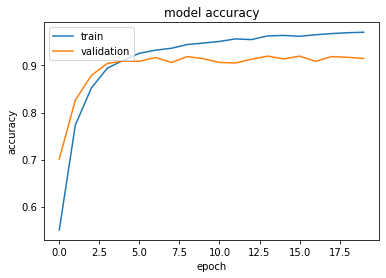

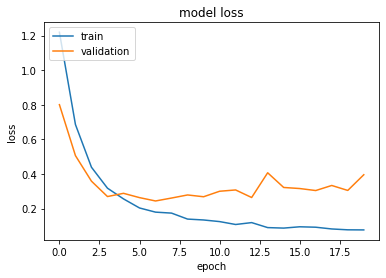

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
score = model.evaluate(X_test, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

2000/2000 [==============================] - 0s 94us/sample - loss: 0.4267 - accuracy: 0.9120
Test Loss: 0.42673307242034936
Test Accuracy: 0.912


In [49]:
# saving the trained model

model.save('saved_model_text_classification')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model_text_classification\assets


# Prediction of test dataset

In [50]:
predictions = model.predict(X_test)

In [51]:
i = 159
b = list([X_test[i]])
print(tokenizer.sequences_to_texts(b))

['hope like honest amp raw blog post amp feeling unhappy hope makes feel less alone <OOV> <OOV> <OOV> <OOV> <OOV>']


In [52]:
inv_map = {v: k for k, v in label_maping.items()}

myList = predictions[i]
a = np.flipud(np.array([i for i in sorted(enumerate(myList), key=lambda x:x[1])]))
print('Actual Label - ', inv_map[np.argmax(y_test[i])]  , '\n\nPredicted Label -')
print(inv_map[a[0, 0]], ': ', a[0, 1]*100, '%')
print(inv_map[a[1, 0]], ': ', a[1, 1]*100, '%')
print(inv_map[a[2, 0]], ': ', a[2, 1]*100, '%')
print(inv_map[a[3, 0]], ': ', a[3, 1]*100, '%')
print(inv_map[a[4, 0]], ': ', a[4, 1]*100, '%')

Actual Label -  sadness 

Predicted Label -
sadness :  99.99995231628418 %
joy :  5.274860086501576e-05 %
fear :  2.6329894708965185e-06 %
anger :  2.2743439076489125e-08 %
surprise :  4.2372620169539577e-10 %


# Prediction on custom inputs

In [53]:
t = 'i am very excited to show you my test results'
data_seq = tokenizer.texts_to_sequences([t])
data_pad = pad_sequences(data_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

data_pad

array([[   1,    1,    1,  163,    1,  258,    1,    1, 1306,  919,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [54]:
t_prediction = model.predict(data_pad)
a = np.flipud(np.array([i for i in sorted(enumerate(t_prediction[0]), key=lambda x:x[1])]))
print(inv_map[a[0, 0]], ': ', a[0, 1]*100, '%')
print(inv_map[a[1, 0]], ': ', a[1, 1]*100, '%')
print(inv_map[a[2, 0]], ': ', a[2, 1]*100, '%')
print(inv_map[a[3, 0]], ': ', a[3, 1]*100, '%')
print(inv_map[a[4, 0]], ': ', a[4, 1]*100, '%')

joy :  99.61516261100769 %
sadness :  0.3156393766403198 %
love :  0.0356364093022421 %
fear :  0.01440830819774419 %
surprise :  0.012602000788319856 %
